Praktikum zu Vorlesung
[__Modellreduktion parametrisierter Systeme__](https://www.uni-muenster.de/AMM/Veranstaltungen/SS19/Modellreduktion/)

Mario Ohlberger, Felix Schindler

# Blatt 01, 10.04.2019

## Aufgabe 0: jupyter Notebook Server starten

1. Aktivieren Sie die virtuelle Umgebung zum Praktikum und starten Sie den Notebook server. Zur Erinnerung:

  * Terminal starten (`super`-Taste/`Windows`-Taste, `terminal` eingeben, `Enter`)

  * ins Projektverzeichnis wechseln

    ```bash
    cd ~/vorlesung_modellreduktion
    ```

  * die virtuelle Umgebung aktivieren

    ```bash
    source python_umgebung_praktikum_modellreduktion/bin/activate
    ```

  * Notebook server starten

    ```bash
    jupyter-notebook --notebook-dir=notebooks
    ```


2. Benennen Sie das notebook von letzter Woche von `grid_interpolations` in `grid_visualization` um.

3. Erstellen Sie ein neues `Python 3` notebook und benennen Sie es in `interpolations` um.

4. Importieren Sie `numpy` und `pymor.basic` und machen Sie `matplotlib` für das Notebook nutzbar.

In [1]:
%matplotlib notebook
import numpy as np
from pymor.basic import *

## Aufgabe 1: Wiederholung

1. Schreiben Sie eine Python Funktion `visualize_fv(v_h, grid, title)`, die für eine diskrete Funktion $v_h = $ `v_h` (gegeben als `VectorArray` der Länge 1), Gitter $\mathcal{T}_h = $ `grid` und Titel `title`, die Funktion $v_h \in V_h^0$ visualisiert, wobei wie in [Blatt 00]

   $$V_h^0 := \big\{ v \in L^2(\Omega) \;\big|\; v|_K \in \mathbb{P}_0(K)\quad\forall K \in \mathcal{T}_h\big\}$$
   
   den Raum der stückweise konstanten Funktionen bzgl. des Gitters (_Finite Volumen_ Raum) bezeichnet ($\mathbb{P}_p(\omega)$ ist dabei der Raum der Polynome vom Grad kleiner gleich $p \in \mathbb{N}$ über einem Gebiet $\omega \subset \mathbb{R}^d$).

  * Kopieren Sie dazu den Programmcode aus [Blatt 00], um einen entsprechenden `PatchVisualizer` anzulegen und dessen `visualize` Methode zu nuzten.
  * Stellen Sie sicher, dass `v_h` die richtige Länge und Dimension hat.

In [2]:
from pymor.gui.visualizers import PatchVisualizer

def visualize_fv(v_h, grid, title):
    fv_visualizer = PatchVisualizer(grid, bounding_box=grid.bounding_box, codim=0)
    fv_visualizer.visualize(v_h, d=None, legend=title)

2. Schreiben Sie eine Python Funktion `visualize_grid(grid)`, die ein gegebenes Gitter $\mathcal{T}_h = $ `grid` visualisiert.

  * Kopieren Sie dazu den Programmcode aus [Blatt 00], um den DoF Vektor der Funktion
    $$v_h \in V_h^0,\quad\quad v_h|_K := \text{index of } K \text{ in the grid},\quad\forall K \in \mathcal{T}_h$$
    aus `grid` zu erhalten, einen entsprechenden `fv_space` als `NumpyVectorSpace` anzulegen, die Funktion $v_h$ als Element von $V_h^0$ mit Hilfe von `fv_space` zu erhalten.
  * Nutzen Sie die `visualize_fv` Funktion.


In [3]:
def visualize_grid(grid):
    vertices = grid.centers(grid.dim)
    fv_space = NumpyVectorSpace(dim=grid.size(0), id_='FV')
    v_h = fv_space.from_data(np.arange(fv_space.dim))
    visualize_fv(v_h, grid, 'element indices of a TriaGrid with {} elements'.format(grid.size(0)))

3. Testen Sie Ihre Funktionen, indem Sie ein Dreicksgitter $\mathcal{T}_h$ mit $1^2$ Intervallen des Gebiets $\Omega = [0, 1]^2$ visualisieren.

   * Kopieren Sie den Programmcode aus [Blatt 00], um ein Gebiet und ein Dreiecksgitter anzulegen.
   * Rufen Sie die `visualize_grid` Funktion auf.

<IPython.core.display.Javascript object>


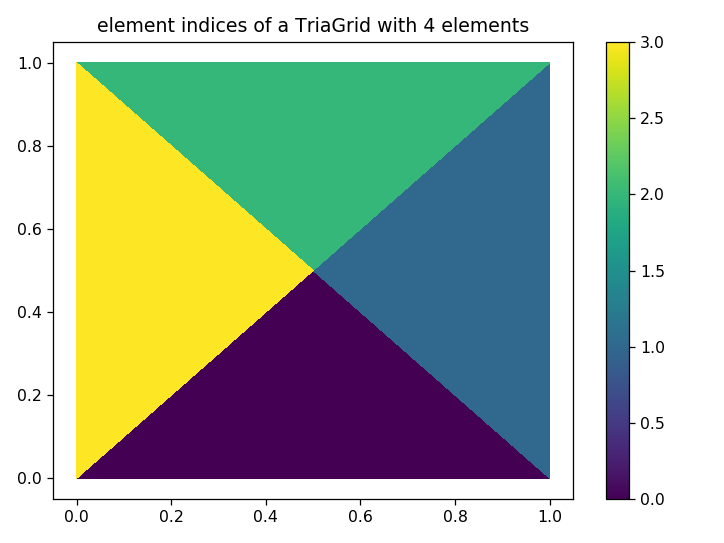

In [4]:
omega = RectDomain(([0, 0], [1, 1]))
grid = TriaGrid(num_intervals=(1, 1), domain=omega.domain)
visualize_grid(grid)

## Aufgabe 2: Lagrange Interpolation

Zur Visualisierung einer Funktion $f: \Omega \to \mathbb{R}$ auf einem gegebenen Gitter $\mathcal{T}_h$ von $\Omega \subset \mathbb{R}^d$, $d = 1, 2, 3$, benötigen wir eine geeignete Approximation $f_h$. Für stetige Funktionen $f \in C^0$ bietet sich dazu die Lagrange-Interpolation an. Sei dazu

$$S_h^1 := \big\{ v \in C^0(\Omega) \;\big|\; v|_K \in \mathbb{P}_1(K)\quad\forall K \in \mathcal{T}_h\big\} \subset C^0(\Omega)$$

der Raum der stetigen und stückweisen linearen Funktionen bezüglich des Gitters.

Sei $\mathcal{T}_h^d$ die Menge aller Knotenpunkte des Gitters (Entitäten mit Kodimension $d$) und $I := |\mathcal{T}_h^d| \in \mathbb{N}$ die Anzahl der Knotenpunkte.
Dann ist eine Basis von $S_h^1$ gegeben durch

$$\big\{ \varphi_0, \dots, \varphi_{I - 1} \big\}$$

wobei die Hütchenfunktion $\varphi_i$ zu einem Knotenpunkt $\nu_i \in \mathcal{T}_h^d$ eindeutig definiert ist durch

$$\varphi_i(\nu_j) := \delta_{i, j} := \begin{cases}1, & \text{falls }i = j,\\0, &\text{sonst}\end{cases}$$

(diese Basis wird __Lagrange-Basis__ genannt).

Damit ist jede Funktion $v_h \in S_h^1$ eindeutig definiert durch die Angabe ihrer Werte in den Knotenpunkten des Gitters, denn aus der Basisdarstellung

$$v_h(x) = \sum_{i = 0}^{I - 1} \underline{v_h}_i \varphi_i(x)$$

und der Definition der Basis folgt, dass $\underline{v_h}_i = v_h(\nu_i)$.

Wir können also $S_h^1$ isomorph mit $\mathbb{R}^I$ identifizieren und jede Funktion $v_h \in S_h^1$ mit ihrem DoF Vektor (_Degree of Freedom_: Freiheitsgrad) $\underline{v_h} \in \mathbb{R}^I$, wobei $\underline{v_h}_i := v_h(\nu_i)$ für alle $0 \leq i_ < I$.

Um für eine beliebige Funktion $f: \Omega \to \mathbb{R}$ eine Approximation in $S_h^1$ zu erhalten, betrachten wir die __Lagrange-Interpolation__

$$\Pi_{S_h^1}: C^0(\Omega) \rightarrow S_h^1,\quad\quad f \mapsto \Pi_{S_h^1}[f],$$

die eindeutig definiert ist durch die Angabe ihrer Werte in den Knotenpunkten,

$$\Pi_{S_h^1}[f](\nu_i) := f(\nu_i) \text{ für } 0 \leq i < I.$$

Als Approximation von $f$ erhalten wir also $f_h \in S_h^1$ als $f_h := \Pi_{S_h^1}[f]$ und den dazugehörigen DoF Vektor $\underline{f_h} \in \mathbb{R}^I$ durch

$$\underline{f_h}_i := f(\nu_i), \text{ für alle } 0 \leq 1 < I.$$

_Bemerkung_: Die Lagrange-Interpolation ist eine Projektion, denn $(\Pi_{S_h^1} \circ \Pi_{S_h^1})[v_h] = \Pi_{S_h^1}[v_h]$ für alle $v_h \in S_h^1$.

1. Schreiben Sie eine Python Funktion `interpolate_lagrange_p1(f, grid)`, die für eine gegebene Funktion $f = $ `f` und Gitter $\mathcal{T}_h = $ `grid` die Lagrange-Interpolierte $f_h := \Pi_{S_h^1}[f]$ als geeignetes `VectorArray` zurück gibt.

   * Definieren Sie $S_h^1$ als `NumpyVectorSpace` entsprechender Dimension, mit der Kennung `CG` (_continuous Galerkin_) und legen Sie ein entsprechendes Objekt `cg_space` an.
   * Werten Sie die Funktion `f` an allen Knotenpunkten des Gitters aus, um $\underline{f_h}$ zu erhalten.
   * Erstellen Sie $f_h \in S_h^1$, indem Sie die entsprechende Funktion des `cg_space` nutzen.

In [5]:
def interpolate_lagrange_p1(f, grid):
    cg_space = NumpyVectorSpace(dim=grid.size(grid.dim), id_='CG')
    vertices = grid.centers(grid.dim)
    f_h = f.evaluate(vertices)
    return cg_space.from_data(f_h)

2. Testen Sie Ihre `interpolate_lagrange_p1` Funktion, indem Sie die wie in [Blatt 00, Aufgabe 1] gegebene Funktion $f: \Omega \to \mathbb{R}$, $f(x_0, x_1) := x_0 \cdot x_1$ auf $\Omega = [0, 1]^2$ interpolieren.

   * Erstellen Sie $f$ als `ExpressionFunktion`.
   * Rufen Sie `interpolate_lagrange_p1` mit dieser Funktion und dem Gitter aus Aufgabe 1 auf und geben Sie die Länge und Dimension des resultierenden `VectorArray`s, sowie die Anzahl der Knotenpunkte des Gitters aus.

In [6]:
f = ExpressionFunction('x[..., 0]*x[..., 1]', dim_domain=2, shape_range=())
f_h = interpolate_lagrange_p1(f, grid)
print(len(f_h))
print(f_h.dim)
print(grid.size(grid.dim))

1
5
5


3. Schreiben Sie eine Funktion `visualize_lagrange_p1(v_h, grid, title)`, die für eine diskrete Funtion $v_h = $ `v_h` (gegeben als `VectorArray` der Länge 1), Gitter $\mathcal{T}_h = $ `grid` und Titel `title`, die Funktion $v_h \in S_h^1$ visualisiert.

   * Stellen Sie sicher, dass `v_h` die richtige Länge und Dimension hat.
   * Erstellen Sie einen `cg_visualizer` vom Typ [PatchVisualizer](http://docs.pymor.org/en/0.5.1/generated/pymor.gui.html#pymor.gui.visualizers.PatchVisualizer), achten Sie auf die korrekte Kodimension!
   - Nutzen Sie die `visualize` Methode, geben Sie mit `legend=` einen Titel an, setzen Sie bei Bedarf `d=None`.

In [7]:
def visualize_lagrange_p1(v_h, grid, title):
    assert len(v_h) == 1
    assert v_h.dim == grid.size(grid.dim)
    cg_visualizer = PatchVisualizer(grid, bounding_box=grid.bounding_box, codim=2)
    cg_visualizer.visualize(v_h, d=None, legend=title)

4. Testen Sie Ihre `visualize_lagrange_p1` Funktion, indem Sie die Funktion $f$ für verschiede Gitter interpolieren und visualisieren, messen Sie dabei jeweils die Zeit für
   
   * Anlegen des Gitters
   * Interpolation
   * Visualisierung
   
   Testen Sie mindestens folgende Gitter:
   
   * ein grobes Dreiecksgitter mit $1^2$ Intervallen
   * ein feines Dreiecksgitter mit $512^2$ Intervallen
   * ein grobes Vierecksgitter mit $2^2$ Intervallen
   * ein feines Vierecksgitter ($1024^2$ Intervallen)

creating simplex grid with 4 elements took 0.0012879371643066406s
interpolation took 0.0045588016510009766s


<IPython.core.display.Javascript object>


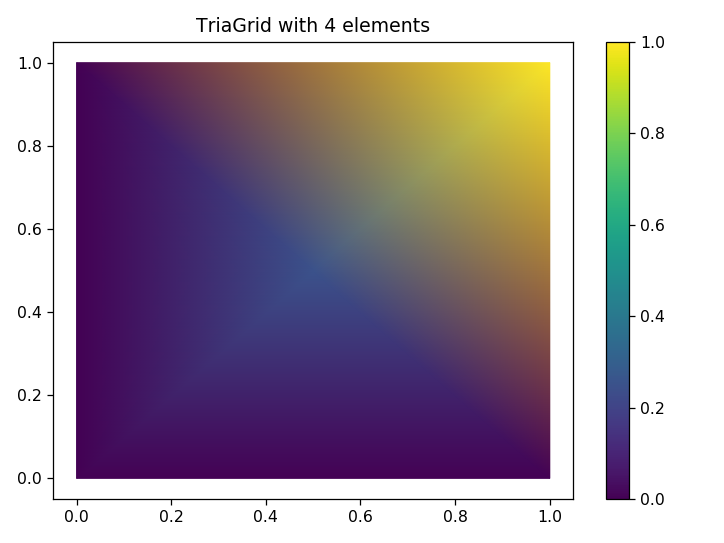

visualization took 0.10411477088928223s


In [8]:
import time
t = time.time()
grid = TriaGrid(num_intervals=(1, 1), domain=omega.domain)
print('creating simplex grid with {} elements took {}s'.format(grid.size(0), time.time() - t))
t = time.time()
f_h = interpolate_lagrange_p1(f, grid)
print('interpolation took {}s'.format(time.time() - t))
t = time.time()
visualize_lagrange_p1(f_h, grid, 'TriaGrid with {} elements'.format(grid.size(0)))
print('visualization took {}s'.format(time.time() - t))

creating simplex grid with 1048576 elements took 0.11692428588867188s
interpolation took 3.60695481300354s


<IPython.core.display.Javascript object>


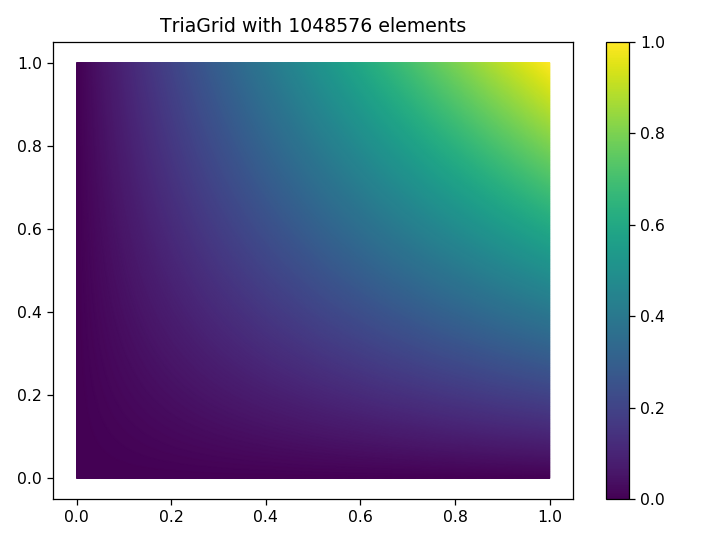

visualization took 10.50976037979126s


In [9]:
t = time.time()
grid = TriaGrid(num_intervals=(512, 512), domain=omega.domain)
print('creating simplex grid with {} elements took {}s'.format(grid.size(0), time.time() - t))
t = time.time()
f_h = interpolate_lagrange_p1(f, grid)
print('interpolation took {}s'.format(time.time() - t))
t = time.time()
visualize_lagrange_p1(f_h, grid, 'TriaGrid with {} elements'.format(grid.size(0)))
print('visualization took {}s'.format(time.time() - t))

creating cubic grid with 4 elements took 0.00307464599609375s
interpolation took 0.002695322036743164s


<IPython.core.display.Javascript object>


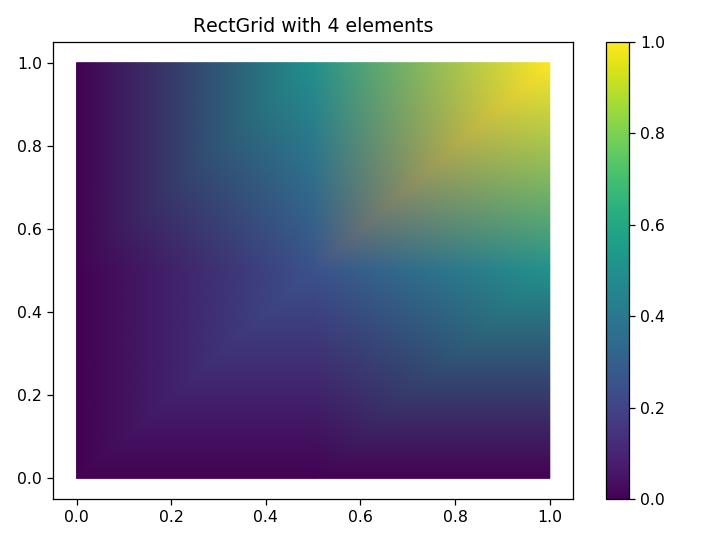

visualization took 0.10469818115234375s


In [10]:
t = time.time()
grid = RectGrid(num_intervals=(2, 2), domain=omega.domain)
print('creating cubic grid with {} elements took {}s'.format(grid.size(0), time.time() - t))
t = time.time()
f_h = interpolate_lagrange_p1(f, grid)
print('interpolation took {}s'.format(time.time() - t))
t = time.time()
visualize_lagrange_p1(f_h, grid, 'RectGrid with {} elements'.format(grid.size(0)))
print('visualization took {}s'.format(time.time() - t))

creating cubic grid with 1048576 elements took 0.15709519386291504s
interpolation took 4.54743766784668s


<IPython.core.display.Javascript object>


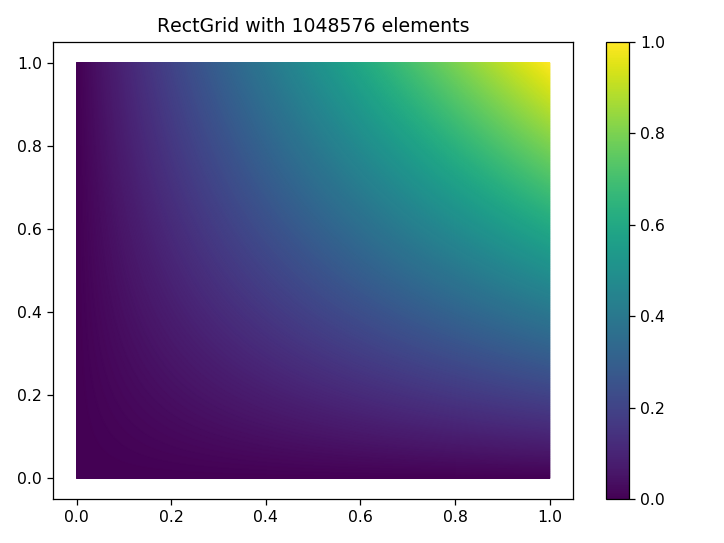

visualization took 19.82135844230652s


In [11]:
t = time.time()
grid = RectGrid(num_intervals=(1024, 1024), domain=omega.domain)
print('creating cubic grid with {} elements took {}s'.format(grid.size(0), time.time() - t))
t = time.time()
f_h = interpolate_lagrange_p1(f, grid)
print('interpolation took {}s'.format(time.time() - t))
t = time.time()
visualize_lagrange_p1(f_h, grid, 'RectGrid with {} elements'.format(grid.size(0)))
print('visualization took {}s'.format(time.time() - t))

## Aufgabe 3: Finite Volumen Interpoaltion

Für allgemeine (unstetige Funktionen) $f: \Omega \to \mathbb{R}$ bietet sich außerdem die Approximation (und Visualisierung) als _Finite Volumen_ Funktion an, die wir schon zur Visualisierung des Gitters genutzt haben.
Sei $\mathcal{T}_h$ ein Gitter mit $I := |\mathcal{T}_h| \in \mathbb{N}$ Elementen (Entitäten der Kodimension 0).
Eine Basis des _Finite Volumen_ Raumes $V_h^0$ ist durch

$$\big\{ \chi_{K_0}, \dots, \chi_{K_{I - 1}} \big\}$$

gegeben, wobei

$$\chi_{K_i} := \begin{cases}1, &\text{für } x \in K_i\\0, &\text{sonst}\end{cases}$$

die Indikatorfunktion bezüglich des Gitterelementes $K_i \in \mathcal{T}_h$ sei, für $0 \leq i < I$.
Da jede Funktion $v_h \in V_h^0$ stückweise konstant bezüglich des Gitters $\mathcal{T}_h$ ist (vergleiche die Definition von $V_h^0$ oben), ist Sie eindeutig durch die Angabe eines Wertes $\underline{v_h}_i \in \mathbb{R}$ auf jedem Gitterelement $K_i \in \mathcal{T}_h$ gegeben, was aus der Basisdarstellung

$$v_h(x) := \sum_{i = 0}^{I - 1} \underline{v_h}_i \chi_{K_i}(x)$$

und der Definition der Basis und $V_h^0$ folgt.

Um für eine beliebige Funktion $f \in L^2(\Omega)$ eine Approximation in $V_h^0$ zu erhalten, betrachten wir die __Finite Volumen-Iterpolation__

$$\Pi_{V_h^0}: L^2(\Omega) \rightarrow V_h^0,\quad\quad f \mapsto \Pi_{V_h^0}[f],$$

die eindeutig definiert ist durch die Angabe ihrer Werte auf den Gitterelementen als Mittelwert der Funktion $f$,

$$\Pi_{V_h^0}[f]\Big|_{K_i} := |K_i|^{-1} \int_{K_i} f(x) \,\text{d}x \text{ für } 0 \leq i < I.$$

Als Approximation von $f$ erhalten wir also $f_h \in V_h^0$ als $f_h := \Pi_{V_h^0}[f]$ und den dazugehörigen DoF Vektor $\underline{f_h} \in \mathbb{R}^I$ durch

$$\underline{f_h}_i := |K_i|^{-1} \int_{K_i} f(x) \,\text{d}x \text{ für } 0 \leq i < I.$$

_Bemerkung_: Die Finite Volumen-Interpolation ist eine Projektion (genauer gesagt eine $L^2$-Projektion), denn $(\Pi_{V_h^0} \circ \Pi_{V_h^0})[v_h] = \Pi_{V_h^0}[v_h]$ für alle $v_h \in V_h^0$.

1. Schreiben Sie eine Python Funktion `interpolate_fv(f, grid)`, die für eine gegebene Funktion $f = $ `f` und Gitter $\mathcal{T}_h = $ `grid` die Finite Volumen-Interpolierte $f_h := \Pi_{V_h^0}[f]$ als geeignetes `VectorArray` zurück gibt.

   * Definieren Sie $V_h^0$ als `NumpyVectorSpace` entsprechender Dimension, mit der Kennung `FV` und legen Sie ein entsprechendes Objekt `fv_space` an.
   * Approximieren Sie den Mittelwert der Funktion auf einem Gitterelement $K \in \mathcal{T}_h$ durch die Auswertung der Funktion im Baryzentrum von $K$, um $\underline{f_h}$ zu erhalten.
   * Erstellen Sie $f_h \in V_h^0$, indem Sie die entsprechende Funktion des `fv_space` nutzen.

In [12]:
def interpolate_fv(f, grid):
    fv_space = NumpyVectorSpace(dim=grid.size(0), id_='FV')
    centers = grid.centers(0)
    f_h = f.evaluate(centers)
    return fv_space.from_data(f_h)

2. Testen Sie Ihre `interpolate_fv` Funktion, indem Sie die Funktion

$$f: \Omega \to \mathbb{R},\quad x \mapsto f(x):= \begin{cases}1,&\text{für } x \in [\tfrac{1}{4}, \tfrac{1}{2}]^2\\0, &\text{sonst}\end{cases}$$

auf $\Omega = [0, 1]^2$ interpolieren.

   * Erstellen Sie $f$ als `ExpressionFunktion`.
   * Rufen Sie `interpolate_fv` mit dieser Funktion und dem groben Dreiecksgitter auf und geben Sie die Länge und Dimension des resultierenden `VectorArray`s, sowie die Anzahl der Elements des Gitters aus.

In [13]:
grid = TriaGrid(domain=omega.domain, num_intervals=(2, 2))
f = ExpressionFunction('(0.25 <= x[..., 0]) * (x[..., 0] <= 0.5) * (0.25 <= x[..., 1]) * (x[..., 1] <= 0.5) * 1.', dim_domain=2, shape_range=())
f_h = interpolate_fv(f, grid)
print(len(f_h))
print(f_h.dim)
print(grid.size(0))

1
16
16


3. Testen Sie Ihre `interpolate_fv` und `visualize_fv` Funktion von oben, indem Sie die Funktion $f$ für verschiede Gitter interpolieren und visualisieren, testen Sie mindestens folgende Gitter:
   
   * ein grobes Dreiecksgitter mit $2^2$ Intervallen
   * ein grobes Dreiecksgitter mit $3^2$ Intervallen
   * ein feineres Dreiecksgitter mit $4^2$ Intervallen
   * ein grobes Vierecksgitter mit $2^2$ Intervallen
   * ein grobes Vierecksgitter mit $3^2$ Intervallen
   * ein feines Vierecksgitter ($4^2$ Intervallen)

<IPython.core.display.Javascript object>


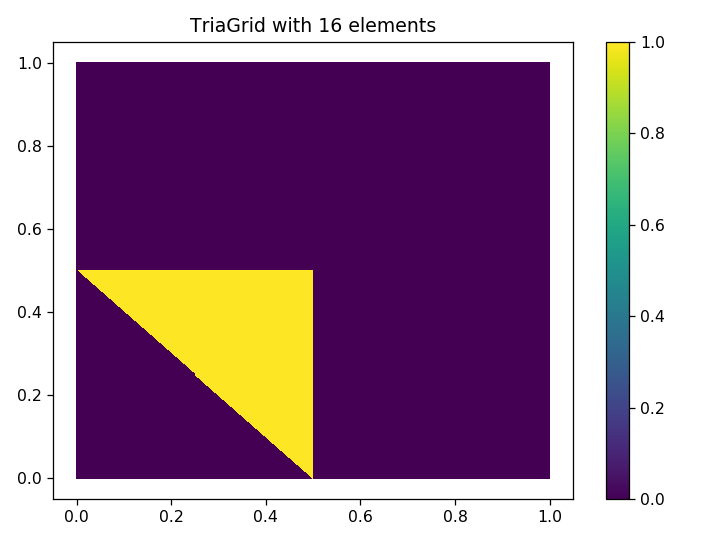

In [14]:
grid = TriaGrid(num_intervals=(2, 2), domain=omega.domain)
f_h = interpolate_fv(f, grid)
visualize_fv(f_h, grid, 'TriaGrid with {} elements'.format(grid.size(0)))

<IPython.core.display.Javascript object>


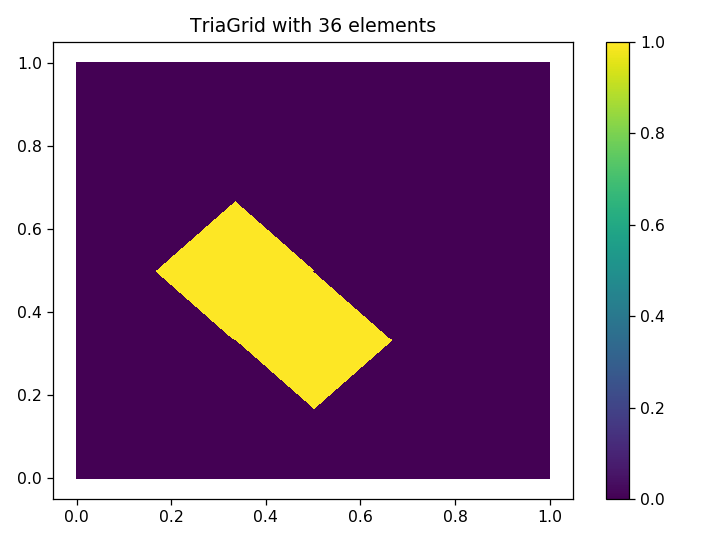

In [15]:
grid = TriaGrid(num_intervals=(3, 3), domain=omega.domain)
f_h = interpolate_fv(f, grid)
visualize_fv(f_h, grid, 'TriaGrid with {} elements'.format(grid.size(0)))

<IPython.core.display.Javascript object>


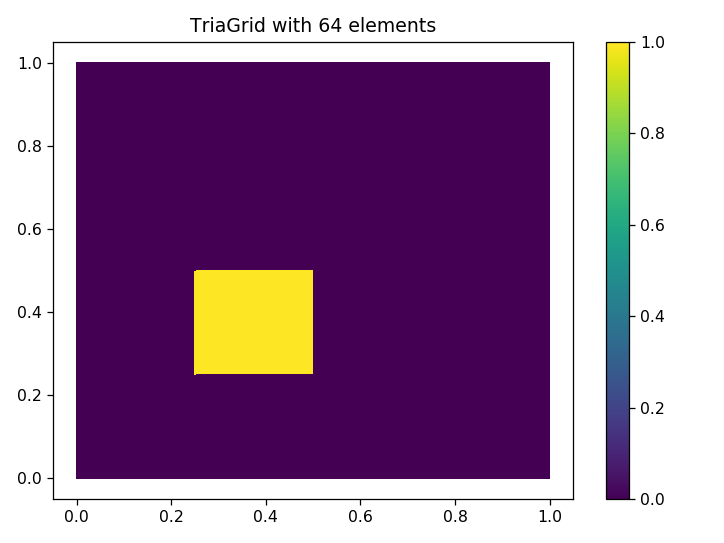

In [16]:
grid = TriaGrid(num_intervals=(4, 4), domain=omega.domain)
f_h = interpolate_fv(f, grid)
visualize_fv(f_h, grid, 'TriaGrid with {} elements'.format(grid.size(0)))

<IPython.core.display.Javascript object>


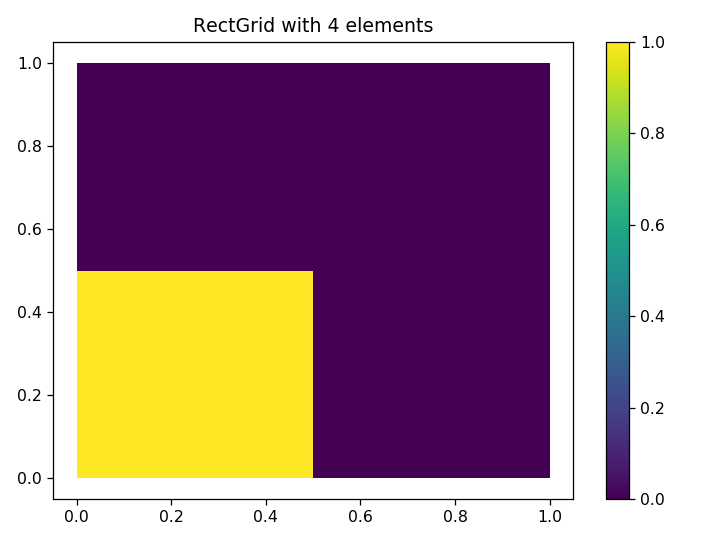

In [17]:
grid = RectGrid(num_intervals=(2, 2), domain=omega.domain)
f_h = interpolate_fv(f, grid)
visualize_fv(f_h, grid, 'RectGrid with {} elements'.format(grid.size(0)))

<IPython.core.display.Javascript object>


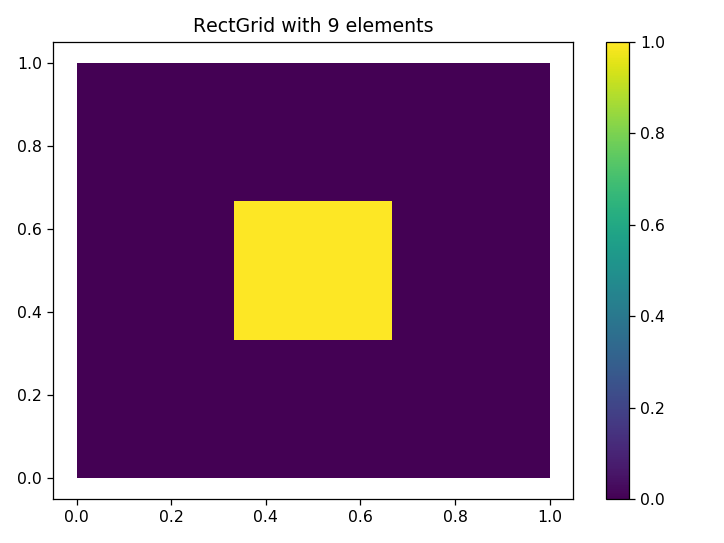

In [18]:
grid = RectGrid(num_intervals=(3, 3), domain=omega.domain)
f_h = interpolate_fv(f, grid)
visualize_fv(f_h, grid, 'RectGrid with {} elements'.format(grid.size(0)))

<IPython.core.display.Javascript object>


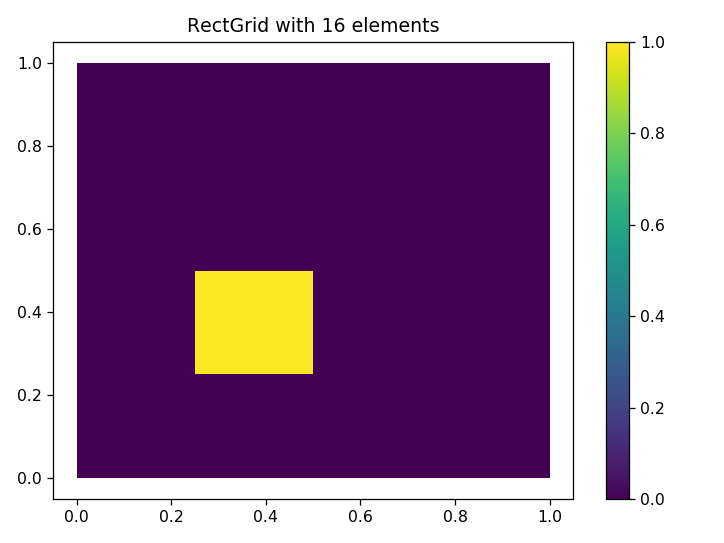

In [19]:
grid = RectGrid(num_intervals=(4, 4), domain=omega.domain)
f_h = interpolate_fv(f, grid)
visualize_fv(f_h, grid, 'RectGrid with {} elements'.format(grid.size(0)))